
# Project: Investigate a Dataset (No-Show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
    
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information from 110k medical appointments in
Brazil and is focused on the question of whether or not patients show up
for their appointment. A number of characteristics about the patient are included in each row.

>> 
● ‘ScheduledDay’ tells us on what day the patient set up their appointment.
● ‘Neighborhood’ indicates the location of the hospital.
● ‘Scholarship’ indicates whether or not the patient is
enrolled in Brasilian welfare program Bolsa Família.
● Be careful about the encoding of the last column: it says ‘No’ if
the patient showed up to their appointment, and ‘Yes’ if they did not show up.


## Question for the Analysis

>What factors are important for us to know in order to predict if a patient will
show up for their scheduled appointment?


In [1]:
# Import statements for all of libereries we will use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> We will load our Dataset and check it for cleanliness then start cleaning it for our analysis. 

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#exploring our Dataset shape
df.shape

(110527, 14)

Our Dataset shows that we have 110527 rows (patients)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Getting to konw our Datatypes in each column, checking if we have any missing values

In [5]:
#getting to know our Dataset more
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Above results show that we have youngest Age is -1 (it's one value like that and we will remove it in our cleaning stage),
Mean Age is 37 years, oldest Age is 115,  Interquartile is between 18 and 55 which means that 50% of our patients are between 18 and 55 years old.
Most of our patients don't have Scholarship or have any chronic diseases, not alchoolic not handcapped.


In [6]:
df["No-show"].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [7]:
#checking for any null values
pd.isna(df).sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There are no Null values

In [8]:
df.duplicated().sum()

0

There are no identical rows duplications

In [9]:
#checking the number of unique values
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

We have 62299 unique Patient Ids

In [10]:
#checking the number of duplicated patient Ids
df['PatientId'].duplicated().sum()

48228

There are 48228 duplicated patient Id

In [11]:
#checking the number of duplicate patient Ids and has No-Show
#in order to know who has duplicated Patient ID and has No-Show status 
df.duplicated(['PatientId','No-show']).sum()

38710

There are 38710 patient Ids with show or no-show status, We will clean our Dataset by removing those entries

In [12]:
MinusValue = df.query('Age == -1')
MinusValue

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


Patient with index 99832 is our entry with wrong age -1 which we will remove later on

In [13]:
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

As we see that most of our patients are not handicap, so we will drop that column as well.

### Data Cleaning

In [14]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop(index = 99832, inplace = True)

In [15]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Now we don't have any minus values, anymore

In [16]:
#correct spelling mistake and false column name for both and seperate the words
df.rename(columns={'PatientId':'Patient Id', 'AppointmentID':'Appointment Id', 'ScheduledDay':'Scheduled Day','AppointmentDay':'Appointment Day',
                   'Hipertension':'Hypertension','Handcap':'Handicap', 'No-show':'No Show'}, inplace = True)
df.head()

,Patient Id,Appointment Id,Gender,Scheduled Day,Appointment Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [17]:
#make all of the words in lowercase, replace space with underscores
df.rename(columns=lambda x:x.strip().lower().replace(" ", "_"), inplace=True)
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [18]:
#remove duplicated Ids wiith duplicated show status
df.drop_duplicates(['patient_id', 'no_show'], inplace = True)
df.shape

(71816, 14)

After removing all duplicates we have now 71816 rows (appointments).

In [19]:
df.drop(['patient_id', 'appointment_id', 'scheduled_day', 'appointment_day', 'handicap'], axis = 1, inplace = True)
df.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,No


In [20]:
#print('Out of {} appointments made by males, {} were missed with the ratio of {}%.'.format(all_appointments_by_m, missed_appointments_by_m, missed_ratio_m))


<a id='eda'></a>
## Exploratory Data Analysis

> Now that I trimmed and cleaned our data, We're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that we posed in the Introduction section. 

### Overview

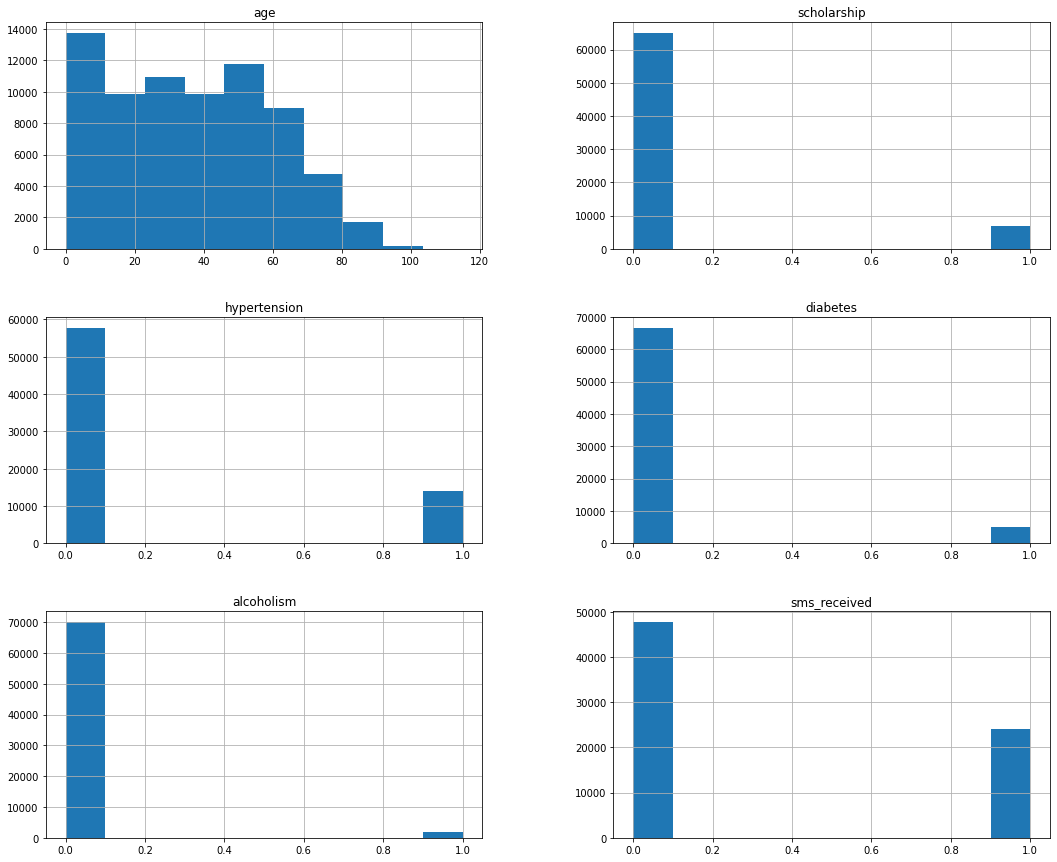

In [21]:
#let's explore our Dataset with Histogram view
df.hist(figsize = (18,15));

In [22]:
#Let's count how many patients showed and how many didn't show
no_of_show = df.no_show == 'No'
no_of_no_show = df.no_show == 'Yes'
df[no_of_show].count(), df[no_of_no_show].count()

(gender           54153
 age              54153
 neighbourhood    54153
 scholarship      54153
 hypertension     54153
 diabetes         54153
 alcoholism       54153
 sms_received     54153
 no_show          54153
 dtype: int64,
 gender           17663
 age              17663
 neighbourhood    17663
 scholarship      17663
 hypertension     17663
 diabetes         17663
 alcoholism       17663
 sms_received     17663
 no_show          17663
 dtype: int64)

total number of patients whom come are 54153 while the patients whom didn't come are 17663

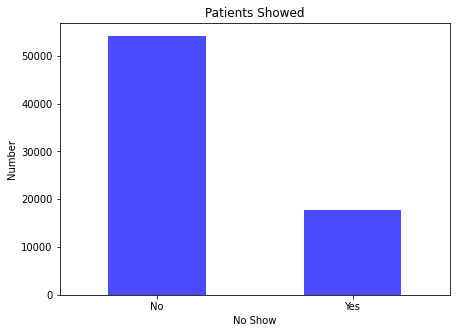

In [23]:
df['no_show'].value_counts().plot.bar(figsize = (7,5), title = 'Patients Showed', color = 'blue', alpha =.7)

plt.xticks(rotation = 'horizontal')
plt.xlabel('No Show')
plt.ylabel('Number');

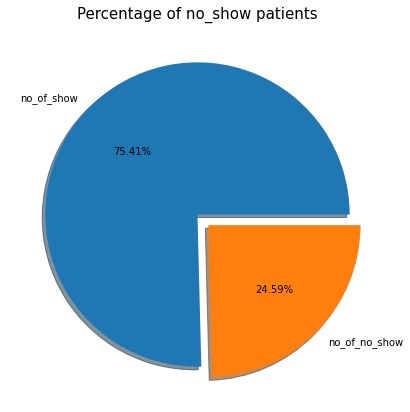

In [24]:
labels = ["no_of_show", "no_of_no_show"]
explode = (0, 0.1)
plt.figure(figsize = (7,7))
plt.pie(df["no_show"].value_counts(), labels = labels, explode = explode, autopct = '%0.2f%%', shadow = True, startangle = 0)
plt.title("Percentage of no_show patients", fontsize = 15)
plt.show()

From this Pie chart we can see that our patients whom didn't show up are 24.6% from the total number of patients we have.

In [25]:
#check the mean Age for each no_of_show and not no_of_show categories we created
df.age[no_of_show].mean()

37.22916551252931

In [26]:
df.age[no_of_no_show].mean()

34.37626677234898

The result shows us that our no_of_show category has mean age of 37 years, while no no_of_show category has mean age of 34 years.
We can see that no_of_show category has less sms received than not no_of_show, which means that we need to analyse sms more.

### Investigate factors that affect the attendance rates:

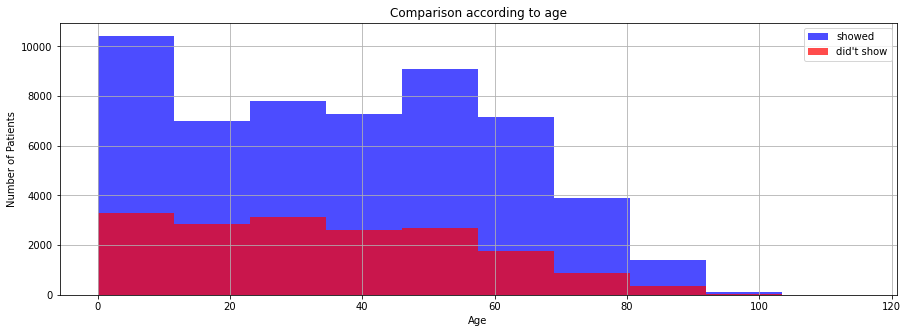

In [27]:
#Does age affects attendance rates?
#we will create a histogram plot to show the relation between Age and no_of_show or no_of_no_show
plt.figure(figsize = [15,5])
df['age'][no_of_show].hist(alpha = .7, color = 'blue', label = 'showed')
df['age'][no_of_no_show].hist(alpha = .7, color = 'red', label = 'did\'t show')
plt.legend();
plt.title('Comparison according to age')
plt.xlabel('Age')
plt.ylabel('Number of Patients');

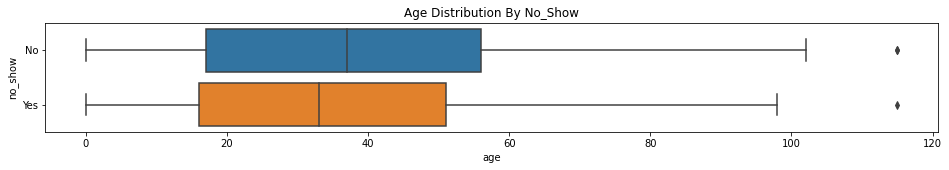

In [28]:
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
plt.xticks(rotation = 'horizontal');
age = sns.boxplot(x=df.age,y=df.no_show).set_title('Age Distribution By No_Show')

Patients with age range 0 to 10 are the most showing, then in second most showing are in range 45 to 55 years, finally the least showing are above 65 years.
The majority of the patients who showed up are between 18 and 55 years old.

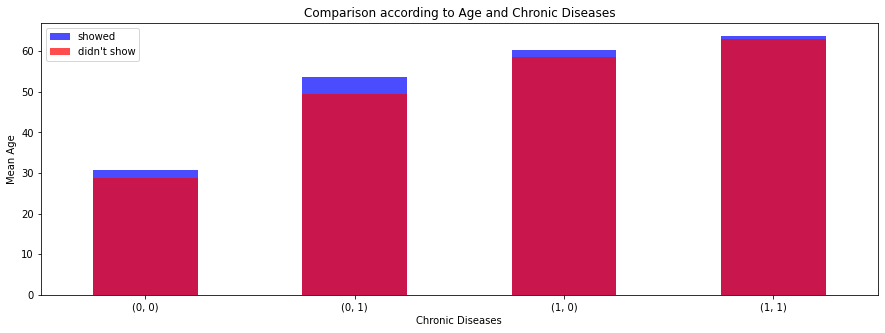

In [29]:
#Do both age and chronic diseases affect attendance rates?
plt.figure(figsize = [15,5])
df[no_of_show].groupby(['hypertension', 'diabetes']).mean()['age'].plot(kind = 'bar',alpha = .7, color = 'blue', label = 'showed')
df[no_of_no_show].groupby(['hypertension', 'diabetes']).mean()['age'].plot(kind = 'bar', alpha =.7, color = 'red', label = 'didn\'t show')

plt.xticks(rotation = 'horizontal');
plt.legend();
plt.title('Comparison according to Age and Chronic Diseases')
plt.xlabel('Chronic Diseases')
plt.ylabel('Mean Age');

In [30]:
df[no_of_show].groupby(['hypertension', 'diabetes']).mean()['age'], df[no_of_no_show].groupby(['hypertension', 'diabetes']).mean()['age']

(hypertension  diabetes
 0             0           30.713360
               1           53.701370
 1             0           60.270517
               1           63.764303
 Name: age, dtype: float64,
 hypertension  diabetes
 0             0           28.768691
               1           49.481172
 1             0           58.650380
               1           62.913282
 Name: age, dtype: float64)

Patients mean Age whom no_of_show have Chronic diseases are 30 years, whom didn't show have mean Age of 28 years. Patients no_of_show with Chronic diseases have mean Age of 64 years, while whom didn't show have mean Age of 63 years.

This insight shows that Age and Chronic diseases are correlated to each other. There is correlation between Chronic diseases and attendance.

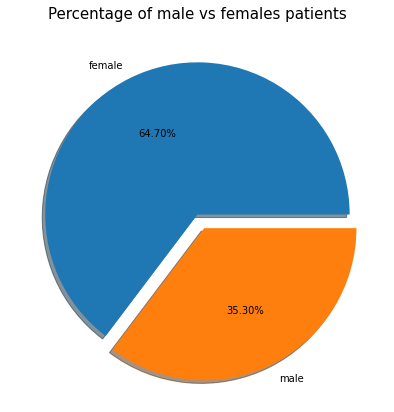

In [31]:
labels = ["female", "male"]
explode = (0, 0.1)
plt.figure(figsize = (7,7))
plt.pie(df["gender"].value_counts(), labels = labels, explode = explode, autopct = '%0.2f%%', shadow = True, startangle = 0)
plt.title("Percentage of male vs females patients", fontsize = 15)
plt.show()

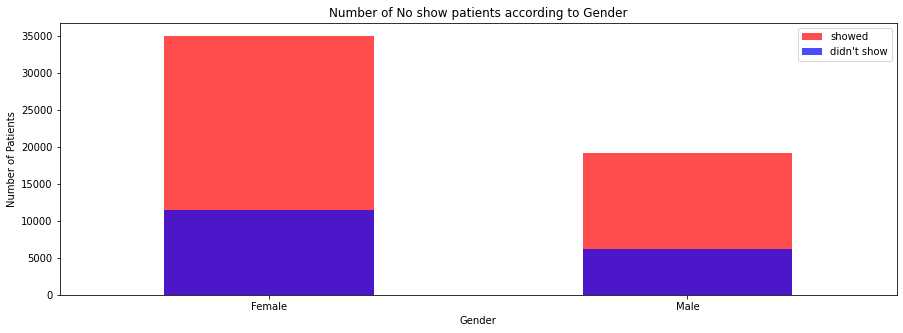

In [32]:
#Does gender affects attendance?

plt.figure(figsize=[15,5])
df[no_of_show]['gender'].value_counts().plot(kind = 'bar', alpha = .7, color = 'red', label = 'showed')
df[no_of_no_show]['gender'].value_counts().plot(kind = 'bar', alpha = .7, color = 'blue', label = 'didn\'t show')


plt.xticks([0, 1], ['Female', 'Male'], rotation = 'horizontal')
plt.legend();
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.title('Number of No show patients according to Gender');

As we see that Females are higher in both cases show and no show and the difference between show and no show in each Gender is close
which means that Gender doesn't affect the attendance rate

In [33]:
print(df[no_of_show].groupby(['gender']).mean()['age'], df[no_of_no_show].groupby(['gender']).mean()['age'],
df[no_of_show].groupby(['gender']).median()['age'], df[no_of_no_show].groupby(['gender']).median()['age'])

gender
F    39.130292
M    33.766269
Name: age, dtype: float64 gender
F    36.06501
M    31.22040
Name: age, dtype: float64 gender
F    39.0
M    32.0
Name: age, dtype: float64 gender
F    34.0
M    29.0
Name: age, dtype: float64


There are almost slight differences between the mean and median which means that there is no correlation between gender and attendance rate.

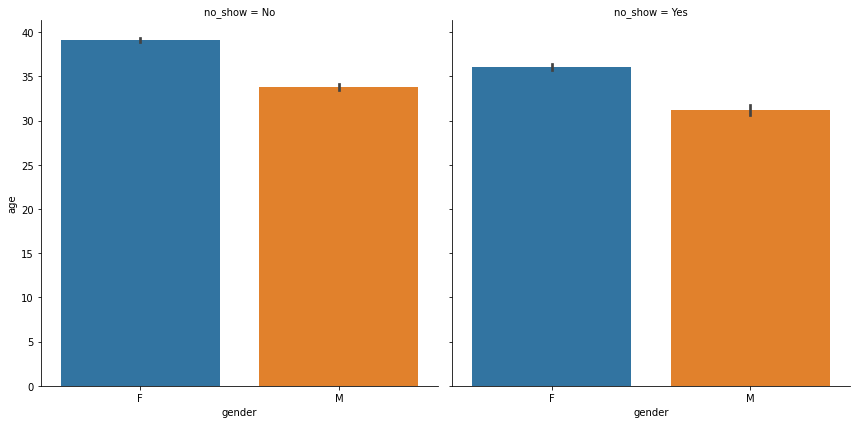

In [34]:
sns.catplot(x="gender", y="age", col="no_show", data=df, height=6, kind="bar");

As we see that the ratio between the attended patients in each gender is similar so we can say that the gender doesn't affect the attendance rate

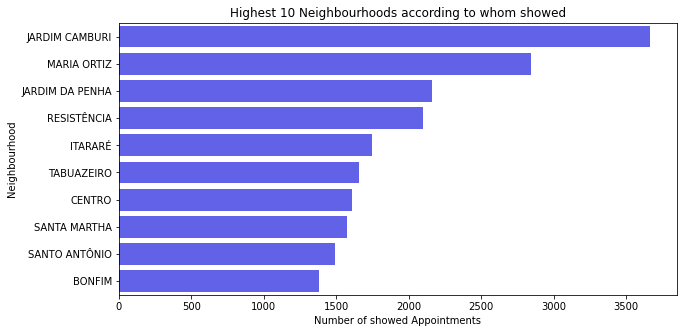

In [35]:
#What is the highest 10 Neighbourhoods according to show?
df_no_of_show = df[df.no_show == "No"]

plt.figure(figsize = [10,5])
ns_order = df_no_of_show['neighbourhood'].value_counts().sort_values(ascending=False).index[:10]
sns.countplot(data = df_no_of_show, y = 'neighbourhood', alpha = .7, color = 'blue', order = ns_order)
plt.title('Highest 10 Neighbourhoods according to whom showed')
plt.xlabel('Number of showed Appointments')
plt.ylabel('Neighbourhood');

As we see that JARDIM Neighbourhood has the highest number of show in appointments then MARIA ORTIZ etc....

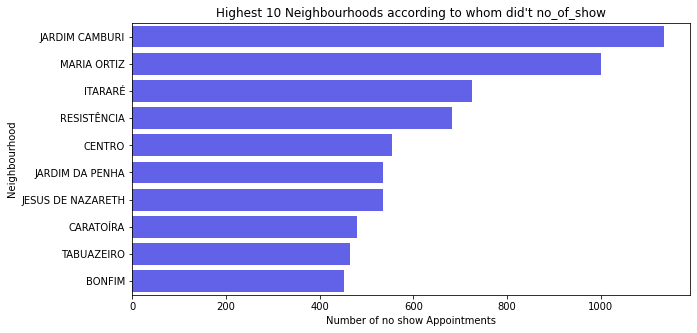

In [36]:
#What is the highest 10 Neighbourhoods according to NO show?
df_no_of_no_show = df[df.no_show == "Yes"]

plt.figure(figsize = [10,5])
ns_order = df_no_of_no_show['neighbourhood'].value_counts().sort_values(ascending=False).index[:10]
sns.countplot(data = df_no_of_no_show, y = 'neighbourhood', alpha = .7, color = 'blue', order = ns_order)
plt.title('Highest 10 Neighbourhoods according to whom did\'t no_of_show')
plt.xlabel('Number of no show Appointments')
plt.ylabel('Neighbourhood');

As we see that JARDIM Neighbourhood has the highest number of no show in appointments then MARIA ORTIZ etc....

In [37]:
df['sms_received'] = df['sms_received'].astype('int64')
sms_r = df['sms_received'] == 1
sms_r.value_counts()

False    47717
True     24099
Name: sms_received, dtype: int64

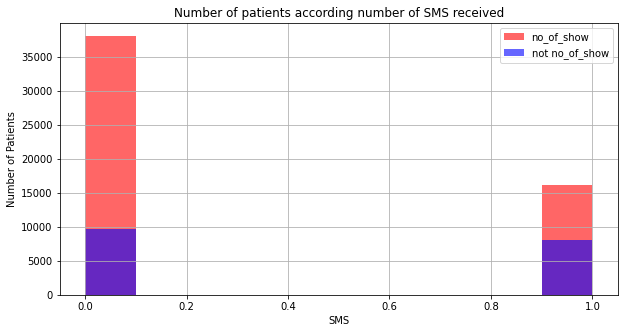

In [38]:
#Does receiving SMS affects the attendance rates?
plt.figure(figsize=[10,5])
df['sms_received'][no_of_show].hist(alpha = .6, color = 'red', label = 'no_of_show')
df['sms_received'][no_of_no_show].hist(alpha = .6, color = 'blue', label = 'not no_of_show')
plt.legend()
plt.xlabel('SMS')
plt.ylabel('Number of Patients')
plt.title('Number of patients according number of SMS received');

The patients who didn't receive SMS and no_of_show are greater than whom received SMS and no_of_show, which lead us to that we need to work on our SMS campaign and enhance it for better results.

<a id='conclusions'></a>
## Conclusions

>
• Age has a clear impact on the attendance rate, The most attending are age between 0 and 10 years, followed by 45 to 55 years. the least are from 65 years and above.
>
• The average age of the patients is 37, 25% of patients are less than 18 years, the majority of patients are between 18 and 55 years.
>
• Almost 25% of the patients didn't show up to their appointments.
>
• Most of the patients don't have Diabetes or Alcoholic or Hypertension.
>
• We saw that the higher percetage of attending regarding to Gender are women which mean that women care about their health more than men.
>
• Neighbourhood has a great impact on the attendance rate. as JARDIM has the highest number of patients no_of_show.
>
• Number Patients didn't receive SMS and no_of_show are greater than who didn't receive SMS, which lead us to the importance to work on the SMS campaign ASAP.


<a id='limitations'></a>
## Limitations

>
We couldn't find any clear correlation between Gender, Chronic Diseases on the attendance rates.
>
If we could know the patient job it would help a lot to determine if there a correlation between the job and being patient
>
If we could know the type of the disease they are visit the clinic for we could investigate the relation between how serve the disease and if they show up 